In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr

In [2]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df1=pdr.get_data_fred('ICNSA')
df1.head()

,ICNSA
DATE,
2019-02-23,203049
2019-03-02,220540
2019-03-09,209302
2019-03-16,194335
2019-03-23,190023


In [4]:
df2=pdr.get_data_fred('IURNSA') 
df2.head()

,IURNSA
DATE,
2019-02-23,1.5
2019-03-02,1.5
2019-03-09,1.4
2019-03-16,1.4
2019-03-23,1.3


<Axes: xlabel='DATE'>

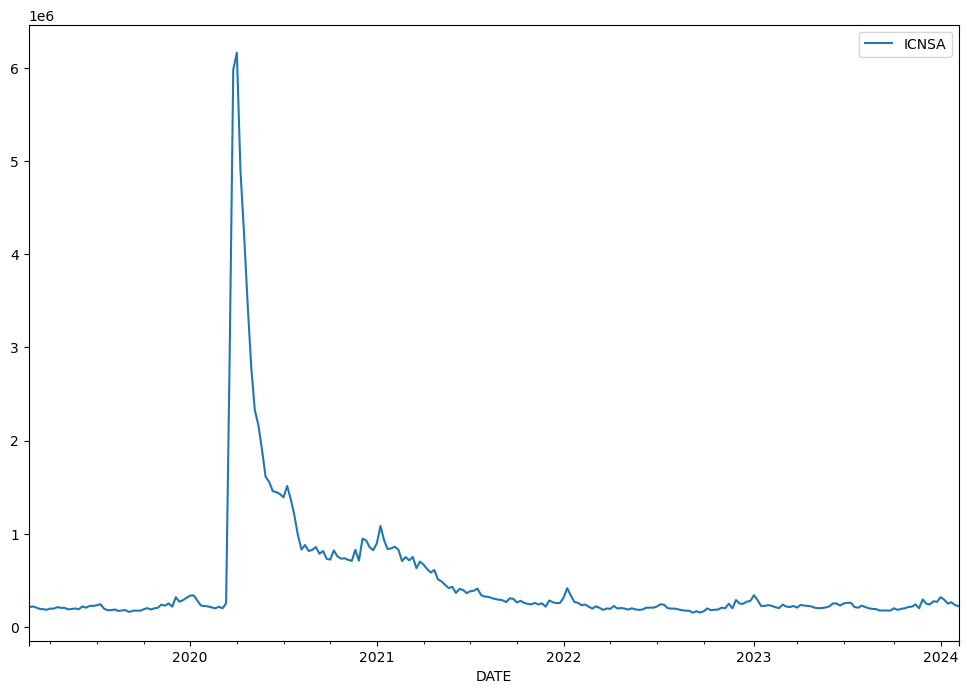

In [5]:
df1.plot(figsize=(12,8), legend=True)

<Axes: xlabel='DATE'>

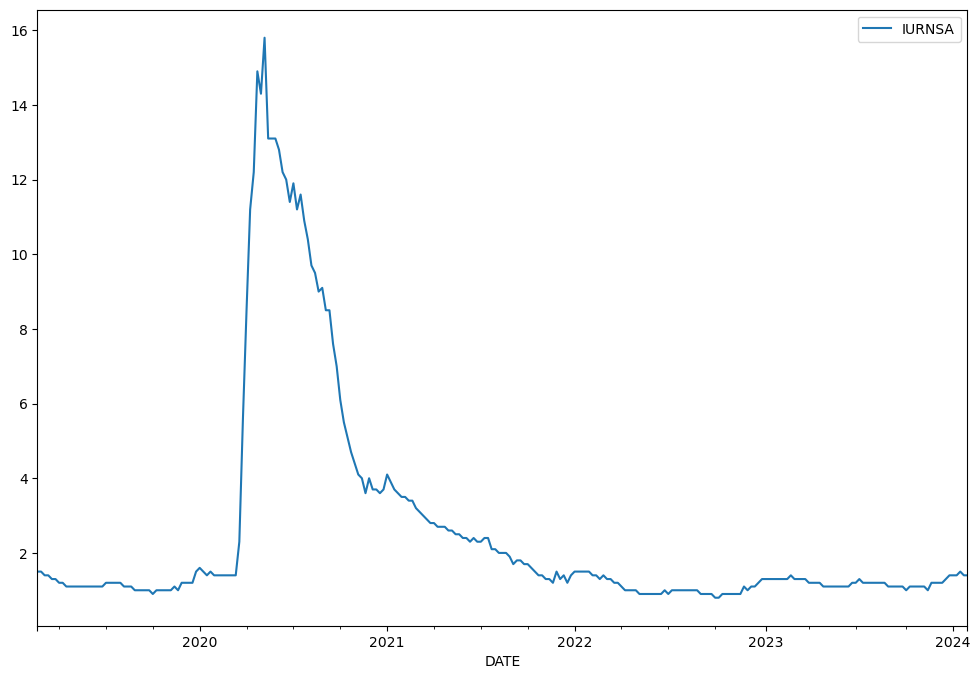

In [6]:
df2.plot(figsize=(12,8),legend=True)

In [7]:
df=df1[:-1]
df['IURNSA']=df2['IURNSA']
df.head()

,ICNSA,IURNSA
DATE,,
2019-02-23,203049,1.5
2019-03-02,220540,1.5
2019-03-09,209302,1.4
2019-03-16,194335,1.4
2019-03-23,190023,1.3


In [8]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df[['ICNSA','IURNSA']],maxlag=3)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.8856  , p=0.0160  , df_denom=255, df_num=1
ssr based chi2 test:   chi2=5.9549  , p=0.0147  , df=1
likelihood ratio test: chi2=5.8872  , p=0.0153  , df=1
parameter F test:         F=5.8856  , p=0.0160  , df_denom=255, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.4806  , p=0.0122  , df_denom=252, df_num=2
ssr based chi2 test:   chi2=9.1391  , p=0.0104  , df=2
likelihood ratio test: chi2=8.9804  , p=0.0112  , df=2
parameter F test:         F=4.4806  , p=0.0122  , df_denom=252, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0539  , p=0.3693  , df_denom=249, df_num=3
ssr based chi2 test:   chi2=3.2506  , p=0.3546  , df=3
likelihood ratio test: chi2=3.2302  , p=0.3575  , df=3
parameter F test:         F=1.0539  , p=0.3693  , df_denom=249, df_num=3


{1: ({'ssr_ftest': (5.885612698701489, 0.015959404626777383, 255.0, 1),
   'ssr_chi2test': (5.9548552010391544, 0.014676808294407012, 1),
   'lrtest': (5.887173148517832, 0.015251563800879837, 1),
   'params_ftest': (5.885612698701473, 0.015959404626777383, 255.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (4.48064995555908, 0.012242740750411159, 252.0, 2),
   'ssr_chi2test': (9.139103480783204, 0.010362603813383034, 2),
   'lrtest': (8.980359381966991, 0.011218627742207478, 2),
   'params_ftest': (4.480649955559297, 0.012242740750408368, 252.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.053921244025356, 0.36934255108425534, 249.0, 3),
   'ssr_chi2test': (3.2506486562709775, 0.3545707076853123, 3),
   'lrtest': (3.2301835971084074, 0.35747858839293933, 3),
   'params_ftest': (1.0539212440253831, 0.36934255108424063, 249.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.

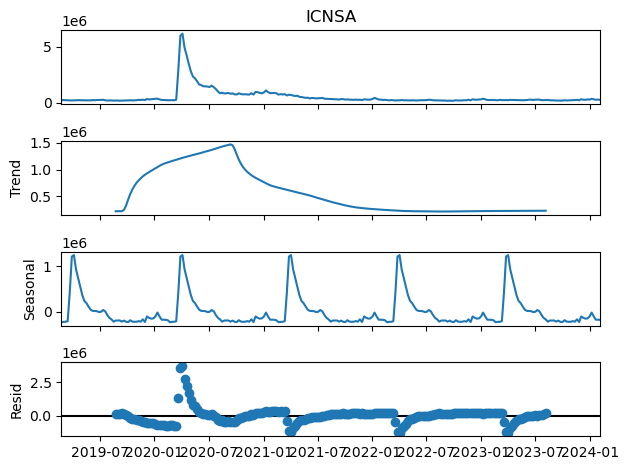

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['ICNSA'],model = 'add')
results.plot();

<Axes: xlabel='DATE'>

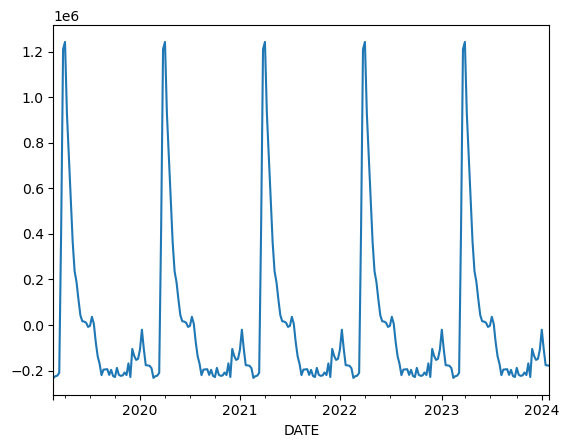

In [10]:
results.seasonal.plot()

In [11]:
from statsmodels.tsa.stattools import adfuller
def adftest(series,title = ''):
  results = adfuller(series)
  labels = ['ADF statistics','p-value','# Lags','# Observations']
  op = pd.Series(results[:4],labels)
  for key,val in results[4].items():
    op[f'Crtical value for {(key)}'] = val
  print(op.to_string())
  if results[1]<=0.05:
    print('Strong evidence against null hypothesis')
    print('Reject null hypothesis')
    print('Data has no unit root and stationary')
  else:
    print('Weak evidence against null hypothesis')
    print('Failed to reject null hypothesis')
    print('Data has unit root and is non stationary')

In [12]:
adftest(df['ICNSA'])

ADF statistics            -3.498671
p-value                    0.008021
# Lags                     4.000000
# Observations           254.000000
Crtical value for 1%      -3.456360
Crtical value for 5%      -2.872987
Crtical value for 10%     -2.572870
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and stationary


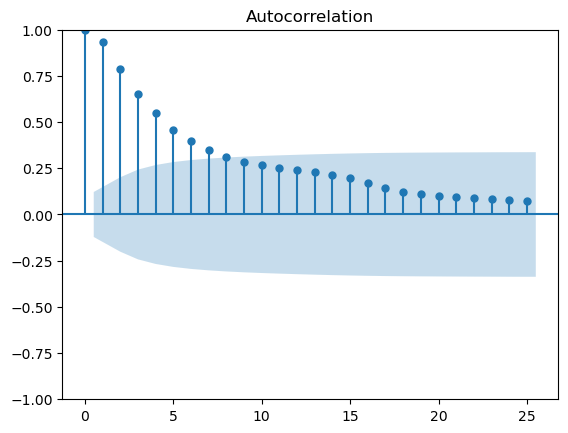

In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df['ICNSA']);

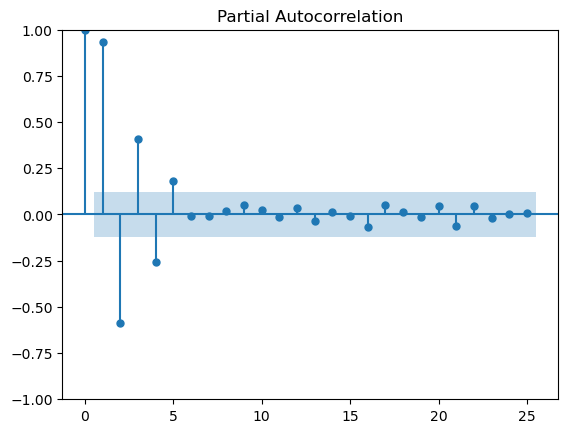

In [14]:
plot_pacf(df['ICNSA']); #pvalue

In [15]:
from pmdarima import auto_arima

# Assuming 'values' is the column you want to use for time series forecasting
values = df['ICNSA']

# Perform auto_arima on the numerical values
auto_arima(values,suppress_warnings=True).summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  259
Model:               SARIMAX(1, 1, 3)   Log Likelihood               -3506.657
Date:                Thu, 22 Feb 2024   AIC                           7023.315
Time:                        11:22:51   BIC                           7041.079
Sample:                    02-23-2019   HQIC                          7030.458
                         - 02-03-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7766      0.063     12.329      0.000       0.653       0.900
ma.L1          0.1508      0.068      2.221      0.026       0.018       0.284
ma.L2         -0.7012      0.060    -11.649      0.000      -0.819      -0.583
ma.L3         -0.3766      0.075     -5.020      0.000      -0.524      -0.230
sigma2      4.005e+10    4.8e-12   8.35e+21      0.000    4.01e+10    4.01e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):            169801.73
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                             9.42
Prob(H) (two-sided):                  0.00   Kurtosis:                       127.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.49e+37. Standard errors may be unstable.
"""

In [16]:
train=df.iloc[:207]
test=df.iloc[207:]
len(test)

52

In [17]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(train['ICNSA'],exog=train['IURNSA'],order=(1,1,3))
model_fit=model.fit()

model_fit.summary()


C:\Users\princ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\princ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\princ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  ICNSA   No. Observations:                  207
Model:                 ARIMA(1, 1, 3)   Log Likelihood               -2838.328
Date:                Thu, 22 Feb 2024   AIC                           5688.656
Time:                        11:22:52   BIC                           5708.624
Sample:                    02-23-2019   HQIC                          5696.732
                         - 02-04-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
IURNSA      1.339e+05   1.59e+04      8.434      0.000    1.03e+05    1.65e+05
ar.L1          0.6790      0.084      8.044      0.000       0.514       0.844
ma.L1         -0.0804      0.089     -0.900      0.368      -0.255       0.095
ma.L2         -0.5523      0.055    -10.036      0.000      -0.660      -0.444
ma.L3         -0.3604      0.110     -3.263      0.001      -0.577      -0.144
sigma2      6.134e+10      0.021   2.86e+12      0.000    6.13e+10    6.13e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             39052.93
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                             6.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        69.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.32e+27. Standard errors may be unstable.
"""

In [18]:
start=len(train)
end=len(train)+len(test)-1
exog_forecast=test['IURNSA']
prediction=model_fit.predict(start=start,end=end,exog=exog_forecast).rename('prediction')

In [19]:
prediction.head()

2023-02-11    240134.980716
2023-02-18    259564.371709
2023-02-25    298177.084635
2023-03-04    301917.258897
2023-03-11    313546.835733
Freq: W-SAT, Name: prediction, dtype: float64

In [20]:
test.head()

,ICNSA,IURNSA
DATE,,
2023-02-11,225332,1.3
2023-02-18,211007,1.3
2023-02-25,202156,1.4
2023-03-04,238840,1.3
2023-03-11,218084,1.3


In [21]:
from sklearn.metrics import mean_squared_error
error=np.sqrt(mean_squared_error(test['ICNSA'],prediction))
print(error)

98150.32455046602


<Axes: xlabel='DATE'>

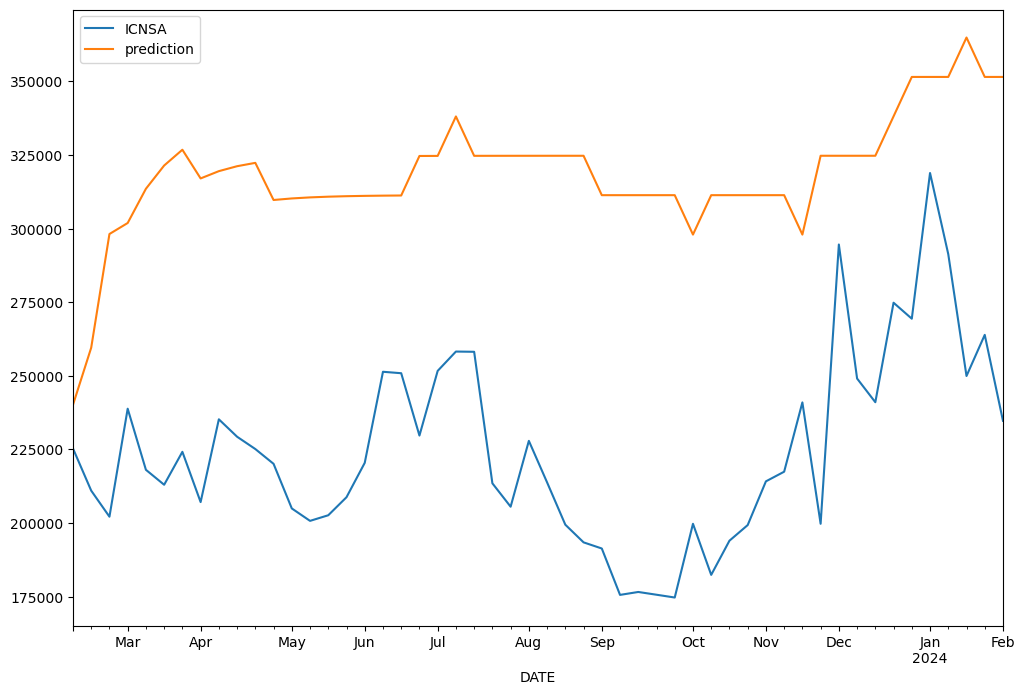

In [22]:
test['ICNSA'].plot(figsize=(12,8),legend=True)
prediction.plot(legend=True)

In [23]:
# for forecasting values of ICNSA let's first forecast value of IURNSA
auto_arima(df2['IURNSA']).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  259
Model:               SARIMAX(3, 1, 0)   Log Likelihood                 -93.814
Date:                Thu, 22 Feb 2024   AIC                            195.627
Time:                        11:22:56   BIC                            209.839
Sample:                    02-23-2019   HQIC                           201.342
                         - 02-03-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3169      0.022     14.437      0.000       0.274       0.360
ar.L2          0.5671      0.017     33.212      0.000       0.534       0.601
ar.L3         -0.2510      0.017    -14.914      0.000      -0.284      -0.218
sigma2         0.1207      0.003     44.710      0.000       0.115       0.126
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             11563.18
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                             2.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
model_IURNSA = ARIMA(df2['IURNSA'],order=(3,1,0))
results = model_IURNSA.fit()
IURNSA_PRED = results.predict(len(df2),len(df2)+51).rename('Forecasted_IURNSA')
print(IURNSA_PRED)

2024-02-10    1.318193
2024-02-17    1.317364
2024-02-24    1.270708
2024-03-02    1.275982
2024-03-09    1.251403
2024-03-16    1.258314
2024-03-23    1.245241
2024-03-30    1.251186
2024-04-06    1.243921
2024-04-13    1.248272
2024-04-20    1.244039
2024-04-27    1.246987
2024-05-04    1.244429
2024-05-11    1.246353
2024-05-18    1.244772
2024-05-25    1.246004
2024-06-01    1.245016
2024-06-08    1.245798
2024-06-15    1.245175
2024-06-22    1.245670
2024-06-29    1.245277
2024-07-06    1.245590
2024-07-13    1.245342
2024-07-20    1.245539
2024-07-27    1.245383
2024-08-03    1.245507
2024-08-10    1.245408
2024-08-17    1.245487
2024-08-24    1.245424
2024-08-31    1.245474
2024-09-07    1.245435
2024-09-14    1.245466
2024-09-21    1.245441
2024-09-28    1.245461
2024-10-05    1.245445
2024-10-12    1.245458
2024-10-19    1.245448
2024-10-26    1.245456
2024-11-02    1.245449
2024-11-09    1.245454
2024-11-16    1.245450
2024-11-23    1.245453
2024-11-30    1.245451
2024-12-07 

C:\Users\princ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\princ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\princ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


In [25]:
len(IURNSA_PRED)

52

In [26]:
IURNSA_PRED.shape

(52,)

In [27]:
new_df=pd.DataFrame({'IURNSA':IURNSA_PRED,'ICNSA': np.nan})
df_new = pd.concat([df, new_df])
df_new.head()

,ICNSA,IURNSA
2019-02-23,203049.0,1.5
2019-03-02,220540.0,1.5
2019-03-09,209302.0,1.4
2019-03-16,194335.0,1.4
2019-03-23,190023.0,1.3


In [28]:
df_new.tail()

,ICNSA,IURNSA
2025-01-04,NaN,1.245452
2025-01-11,NaN,1.245452
2025-01-18,NaN,1.245452
2025-01-25,NaN,1.245452
2025-02-01,NaN,1.245452


In [29]:
len(df_new)

311

In [30]:
fcast_start=len(df)
exog_forecast=df_new[207:][['IURNSA']]
fcast_val=model_fit.predict(start=fcast_start,end=fcast_start+51,exog=exog_forecast).rename('forecasting')

In [31]:
fcast_val

2024-02-10    340581.156893
2024-02-17    340470.180001
2024-02-24    334224.053747
2024-03-02    334930.214284
2024-03-09    331639.617345
2024-03-16    332564.821002
2024-03-23    330814.676687
2024-03-30    331610.553308
2024-04-06    330638.057399
2024-04-13    331220.437052
2024-04-20    330653.750299
2024-04-27    331048.496639
2024-05-04    330706.065511
2024-05-11    330963.628372
2024-05-18    330751.989282
2024-05-25    330916.923179
2024-06-01    330784.530666
2024-06-08    330889.223660
2024-06-15    330805.928287
2024-06-22    330872.129381
2024-06-29    330819.597332
2024-07-06    330861.396863
2024-07-13    330828.237995
2024-07-20    330854.618215
2024-07-27    330833.683458
2024-08-03    330850.331201
2024-08-10    330837.114235
2024-08-17    330847.620623
2024-08-24    330839.276741
2024-08-31    330845.907745
2024-09-07    330840.640549
2024-09-14    330844.825847
2024-09-21    330841.500986
2024-09-28    330844.142706
2024-10-05    330842.043971
2024-10-12    330843

<Axes: xlabel='DATE'>

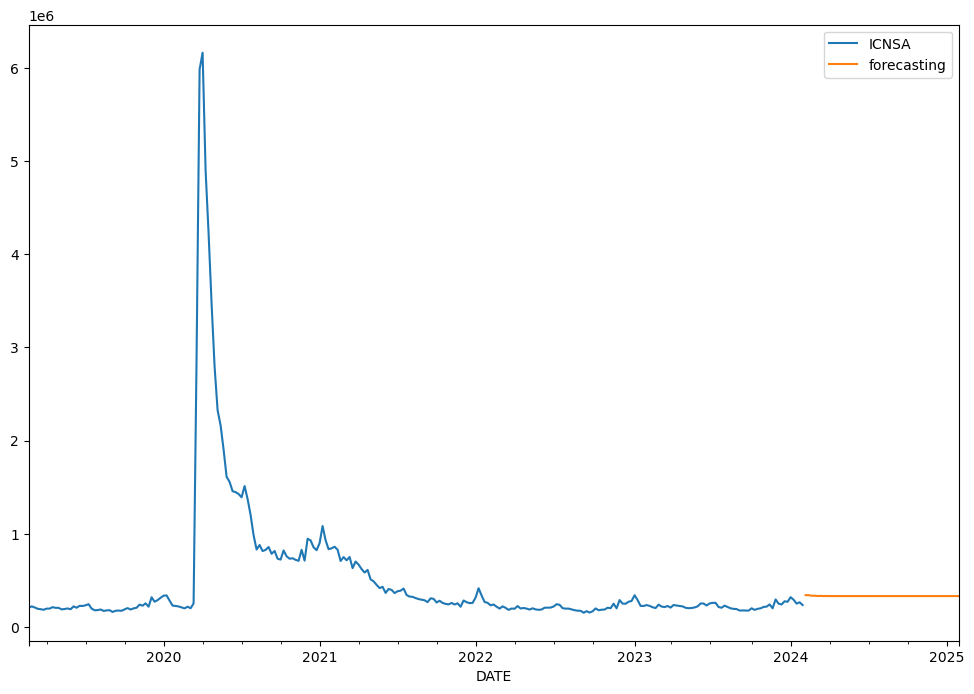

In [32]:
df['ICNSA'].plot(figsize=(12,8),legend=True)
fcast_val.plot(legend=True)

In [33]:
fcast_val.mean()

331424.00645047624